# JOHN DEWEY CORPUS ANALYSIS from W2V

In [1]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import networkx as nx
plt.rcParams["figure.figsize"] = (10,6)

# 0. INTRODUCTION

**Model** is the embedding model obtained on the overall production while **word_vector1**, **word_vector2**, **word_vector3** are the embedding obtained by retrain the model just on the texts of different periods, that are: early work 1881-1898, middle works 1899-1924 and later works 1925-1953.

In [2]:
model = Word2Vec.load("word2vec.model")

In [3]:
word_vector1=KeyedVectors.load("word2vec1.KeyedVectors")
word_vector2=KeyedVectors.load("word2vec2.KeyedVectors")
word_vector3=KeyedVectors.load("word2vec3.KeyedVectors")

## 1. SIMILAR WORDS and ANALOGIES

I focus the attention on three class of entities: concepts, authors and philosophical current, and their relationships.

Remember that this embedding is obtained from a corpus made just of text written from Dewey, so any relationship must be interpreted as derived from the Dewey's point of view.

### 1.1 It is possible to find the most similar word to each concept author or philosophy

In [4]:
model.wv.most_similar(positive=["nature"])

[('natural', 0.4640437364578247),
 ('universe', 0.46314382553100586),
 ('experience', 0.44140109419822693),
 ('conception', 0.4404256343841553),
 ('reality', 0.4178575277328491),
 ('rational', 0.4145975708961487),
 ('knowledge', 0.40846237540245056),
 ('man', 0.40555933117866516),
 ('reason', 0.3926405906677246),
 ('god', 0.38894808292388916)]

In [5]:
model.wv.most_similar(positive=["kant"])

[('hegel', 0.4374355673789978),
 ("kant's", 0.43361929059028625),
 ('fichte', 0.43257033824920654),
 ('kantian', 0.38889387249946594),
 ('successors', 0.3428676128387451),
 ('thought', 0.33499830961227417),
 ('thinginitself', 0.33497729897499084),
 ('caird', 0.3333476781845093),
 ('hegelian', 0.3284324109554291),
 ('reason', 0.3278566300868988)]

In [6]:
model.wv.most_similar(positive=["nietzsche"])

[('sensation', 0.22187213599681854),
 ('supporters', 0.22058333456516266),
 ('opponent', 0.22056534886360168),
 ('idealists', 0.2154388129711151),
 ('egoism', 0.21411974728107452),
 ('conceit', 0.21099041402339935),
 ('pleasing', 0.21049928665161133),
 ('motives', 0.21004901826381683),
 ('optimism', 0.20687159895896912),
 ("germany's", 0.20410558581352234)]

In [7]:
model.wv.most_similar(positive=["empiricism"])

[('rationalism', 0.40973755717277527),
 ('sensationalism', 0.37402820587158203),
 ('pragmatism', 0.3388468027114868),
 ('empiricist', 0.3191395103931427),
 ('empirical', 0.3010837435722351),
 ('sensationalistic', 0.29856905341148376),
 ('theory', 0.2964513301849365),
 ('philosophy', 0.2892789840698242),
 ('experience', 0.27959147095680237),
 ('intuitionalism', 0.27559909224510193)]

In [8]:
model.wv.most_similar(positive=["idealism"])

[('rationalism', 0.398202121257782),
 ('idealistic', 0.3695087432861328),
 ('materialism', 0.34792500734329224),
 ('monism', 0.3464905321598053),
 ('realism', 0.3421689569950104),
 ('philosophy', 0.331146240234375),
 ('transcendental', 0.30961835384368896),
 ('spiritualistic', 0.3046163022518158),
 ('theism', 0.30207106471061707),
 ('phenomenalism', 0.29918453097343445)]

### 1.2 it is possible to exclude the most dissimilar item inside a list

#### Between list of items of the same class
An author that doesn't belong to the same school of thoughts

In [9]:
model.wv.doesnt_match(['hegel', 'fichte', 'schelling','locke'])

'locke'

In [10]:
model.wv.doesnt_match(['james', 'kant', 'hume','locke'])

'james'

A concept that is less connected with the others

In [11]:
model.wv.doesnt_match(['body', 'mind', 'justice'])

'justice'

In [12]:
model.wv.doesnt_match(['reason', 'logic', 'education'])

'education'

A school of thoughts that is less connected

In [13]:
model.wv.doesnt_match(['idealism', 'rationalism', 'pragmatism'])

'pragmatism'

In [14]:
model.wv.doesnt_match(['idealism', 'empiricism', 'pragmatism'])

'idealism'

#### Between heterogeneous list of items
In this case it is possible to exclude the item from another class if it is not strictly related to one of the others item in the list

In [15]:
model.wv.doesnt_match(['hegel', 'locke','mind'])

'mind'

But not if the concept is really important for one author

In [16]:
model.wv.doesnt_match(['kant', 'reason','locke'])

'locke'

## 1.3 It is possible also to made analogies 
#### between items of different classes
It is possible to find the school of thought of an author starting from another one

In [17]:
model.wv.most_similar(positive=["idealism", "kant"], negative=["hegel"], topn=3)

[('rationalism', 0.32210853695869446),
 ('monism', 0.2707808315753937),
 ('successors', 0.2498893439769745)]

The fundamental concept of an author from another one

In [18]:
model.wv.most_similar(positive=["reason", "spinoza"], negative=["kant"], topn=3)

[('divine', 0.34471455216407776),
 ('absolute', 0.2967272102832794),
 ('conception', 0.2782976031303406)]

In [19]:
model.wv.most_similar(positive=["spirit", "leibniz"], negative=["hegel"], topn=3)

[('fellowship', 0.27833133935928345),
 ('life', 0.2636027932167053),
 ('monads', 0.24097949266433716)]

The most relevant concept for a philosophy

In [20]:
model.wv.most_similar(positive=["transcendental", "pragmatism"], negative=["idealism"], topn=3)

[('pragmatist', 0.3208574652671814),
 ('passages', 0.28862226009368896),
 ('verification', 0.27802741527557373)]

#### between items of the same classes

In [21]:
model.wv.most_similar(positive=["fichte", "spinoza"], negative=["hegel"], topn=3)

[('aquinas', 0.2839285731315613),
 ('descartes', 0.28074705600738525),
 ('eternal', 0.23440596461296082)]

In [22]:
model.wv.most_similar(positive=["nietzsche"], negative=['schopenhauer'], topn=3)

[('interest', 0.2229505181312561),
 ("isn't", 0.2225409895181656),
 ('nutriment', 0.20671595633029938)]

## 1.4 Anything done in the section 1 can be checked if it changes over periods

#### Which are the most similar words

In [23]:
word_vector1.most_similar(positive=["metaphysics"])

[('philosophy', 0.4012363851070404),
 ('metaphysical', 0.39473089575767517),
 ('cosmology', 0.3528151214122772),
 ('logic', 0.3471475839614868),
 ('ontology', 0.32003340125083923),
 ('theory', 0.30797284841537476),
 ('ontological', 0.2899245619773865),
 ('epistemology', 0.2849353849887848),
 ('conception', 0.2799559235572815),
 ('nature', 0.277016282081604)]

In [24]:
word_vector2.most_similar(positive=["metaphysics"])

[('metaphysical', 0.38614726066589355),
 ('logic', 0.3640878200531006),
 ('cosmology', 0.34860971570014954),
 ('ontology', 0.34429293870925903),
 ('philosophy', 0.31597352027893066),
 ('theory', 0.28970175981521606),
 ('epistemology', 0.2862379848957062),
 ('conception', 0.2828463017940521),
 ('rational', 0.26980921626091003),
 ('ethics', 0.26882246136665344)]

In [25]:
word_vector3.most_similar(positive=["metaphysics"])

[('metaphysical', 0.3885524570941925),
 ('logic', 0.356221079826355),
 ('philosophy', 0.35383540391921997),
 ('cosmology', 0.32976698875427246),
 ('ontology', 0.321209579706192),
 ('metaphysic', 0.3040098547935486),
 ('conception', 0.2962815463542938),
 ('epistemology', 0.2820686399936676),
 ('nature', 0.2721457779407501),
 ('doctrine', 0.2657340168952942)]

#### Which item doesn't match
(it is not easy to find an example of words for which the output change over time)

In [26]:
word_vector1.doesnt_match(['body', 'james', 'educational'])

'educational'

In [27]:
word_vector2.doesnt_match(['body', 'james', 'educational'])

'james'

In [28]:
word_vector3.doesnt_match(['body', 'james', 'educational'])

'educational'

#### Analogies output

In [29]:
word_vector1.most_similar(positive=["reason", "hegel"], negative=["kant"], topn=3)

[('divine', 0.31041309237480164),
 ('absolute', 0.27123191952705383),
 ('phenomenal', 0.26553666591644287)]

In [30]:
word_vector2.most_similar(positive=["reason", "hegel"], negative=["kant"], topn=3)

[('divine', 0.2970805764198303),
 ('rational', 0.26378825306892395),
 ('idea', 0.25991031527519226)]

In [31]:
word_vector3.most_similar(positive=["reason", "hegel"], negative=["kant"], topn=3)

[('absolute', 0.32237014174461365),
 ('rational', 0.29013243317604065),
 ('divine', 0.27774113416671753)]

## 2. SEMANTIC SHIFT by CLUSTER ANALYSIS

The aim of this section is to show semantic shifts of single words or sets of words by looking at the clusters to which they belong in the embedding over time.

To do that, first of all, we need to restrict our attention to a subset of words. I use the list **interesting_words** obtained in the notebook **W2V DEWEY**.

Note that this list of words is made of the most specific words in the Dewey's production with respect to a reference corpus, it can be very interesting to vary the list according to the research interest.

In [32]:
interesting_words= pickle.load( open( "interesting_words.pickle", "rb" ) )
#check if each word appear in each period
interesting_words=[w for w in interesting_words if w in word_vector1 and w in word_vector2 and w in word_vector3]

In [33]:
len(interesting_words)

197

In [34]:
interesting_words[:10]

['educational',
 'psychology',
 'function',
 'external',
 'specific',
 'concrete',
 'perception',
 'significance',
 'training',
 'analysis']

In [35]:
embedding1=pd.DataFrame([list(word_vector1[str(w)]) for w in interesting_words],index=interesting_words)
embedding2=pd.DataFrame([list(word_vector2[str(w)]) for w in interesting_words],index=interesting_words)
embedding3=pd.DataFrame([list(word_vector3[str(w)]) for w in interesting_words],index=interesting_words)

We can look at the points associated to this list of words by reducing dimensionality with PCA.

In [36]:
pca = PCA(n_components=2)

[Text(0.5, 1.0, 'Word embedding of the first period')]

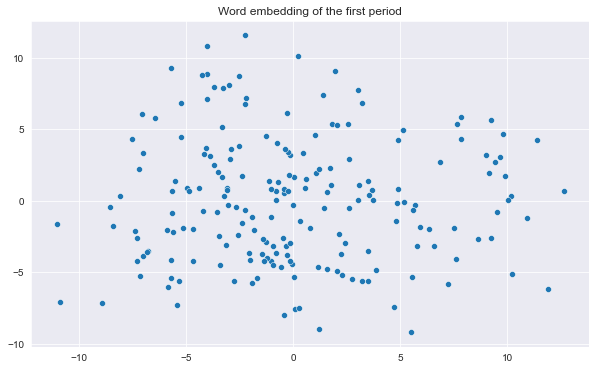

In [37]:
pcs1 = pca.fit_transform(embedding1)

pc1_values = pcs1[:,0]
pc2_values = pcs1[:,1]
sns.scatterplot(x=pc1_values, y=pc2_values).set(title='Word embedding of the first period')

[Text(0.5, 1.0, 'Word embedding of the second period')]

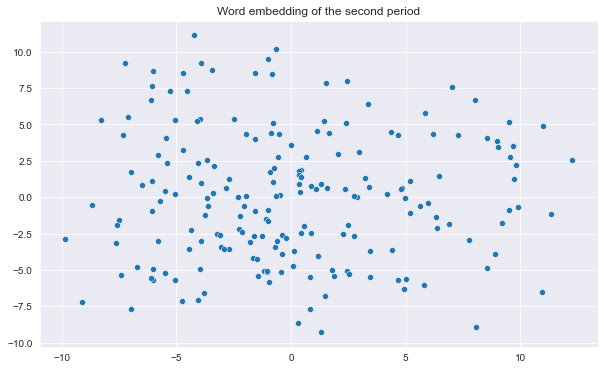

In [38]:
pcs2 = pca.fit_transform(embedding2)

pc1_values = pcs2[:,0]
pc2_values = pcs2[:,1]
sns.scatterplot(x=pc1_values, y=pc2_values).set(title='Word embedding of the second period')

[Text(0.5, 1.0, 'Word embedding of the third period')]

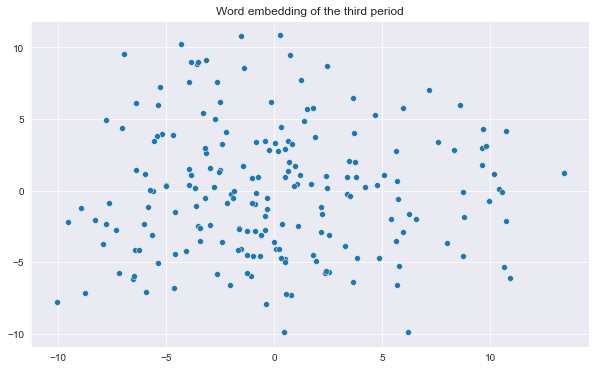

In [39]:
pcs3 = pca.fit_transform(embedding3)

pc1_values = pcs3[:,0]
pc2_values = pcs3[:,1]
sns.scatterplot(x=pc1_values, y=pc2_values).set(title='Word embedding of the third period')

### HOW MANY CLUSTERS?

Now it is possible to apply clustering techniques in each embedding. The number of clusters will be tune heuristically by looking the consistency of clusters, that in this contest is defined as how words tend to be clustered with the same set of words, or trying to minimize the number of connection in the Sankley diagram.

It is also possible to specify the linkage distance threshold above which, clusters will not be merged instead of the number of clusters.

In [40]:
#to arbitrary set the number of clusters per period

n=6 #number of clusters in the first period
m=6 #number of clusters in second period
s=6 #number of clulsters in the third period

In [41]:
clustering_model = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='ward')
# to choose the distance threshold instead of number of clusters
#clustering_model = AgglomerativeClustering(n_clusters=None,distance_threshold=50, affinity='euclidean', linkage='ward')

In [42]:
clustering_model.fit(embedding1)
cluster_labels1 = clustering_model.labels_

In [43]:
clustering_model = AgglomerativeClustering(n_clusters=m, affinity='euclidean', linkage='ward')
# to choose the distance threshold instead of number of clusters
#clustering_model = AgglomerativeClustering(n_clusters=None,distance_threshold=50, affinity='euclidean', linkage='ward')

In [44]:
clustering_model.fit(embedding2)
cluster_labels2 = clustering_model.labels_

In [45]:
clustering_model = AgglomerativeClustering(n_clusters=s, affinity='euclidean', linkage='ward')
# to choose the distance threshold instead of number of clusters
#clustering_model = AgglomerativeClustering(n_clusters=None,distance_threshold=50, affinity='euclidean', linkage='ward')

In [46]:
clustering_model.fit(embedding3)
cluster_labels3 = clustering_model.labels_

In [47]:
n=max(cluster_labels1)+1
m=max(cluster_labels2)+1
s=max(cluster_labels3)+1

Let's check how the clusters look.

Text(0.5, 1.0, 'Clusters of the first period')

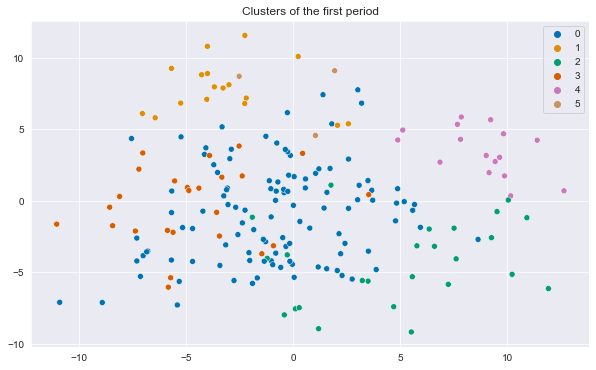

In [48]:
sns.scatterplot(x=pcs1[:,0], y=pcs1[:,1],hue=cluster_labels1,palette='colorblind').set_title('Clusters of the first period')

Text(0.5, 1.0, 'Clusters of the second period')

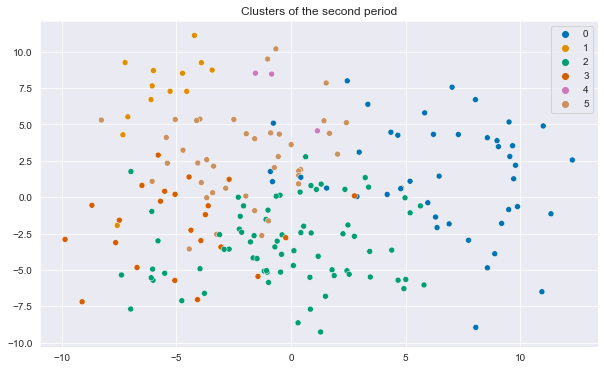

In [49]:
sns.scatterplot(x=pcs2[:,0], y=pcs2[:,1],hue=cluster_labels2,palette='colorblind').set_title('Clusters of the second period')

Text(0.5, 1.0, 'Clusters of the third period')

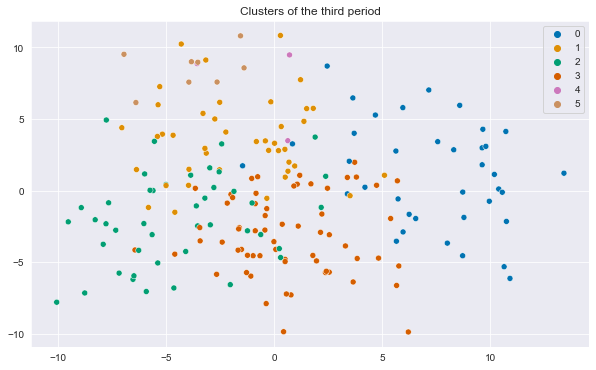

In [50]:
sns.scatterplot(x=pcs3[:,0], y=pcs3[:,1],hue=cluster_labels3,palette='colorblind').set_title('Clusters of the third period')

In [51]:
d={'label1':cluster_labels1,'label2':cluster_labels2,'label3':cluster_labels3}
history=pd.DataFrame(d,index=interesting_words)

In [52]:
def build_Source(n,m,s):
    Source=list()
    for i in range(n):
        for j in range(m):
            Source.append(i)
    for i in range(n,n+m):
        for j in range(s):
            Source.append(i)
    return(Source)

In [53]:
Source=build_Source(n,m,s)

In [54]:
def build_Target(n,m,s):
    Target=list()
    for i in range(n):
        for j in range(n,n+m):
            Target.append(j)
    for i in range(m):
        for j in range(n+m,n+m+s):
            Target.append(j)
    return(Target)

In [55]:
Target=build_Target(n,m,s)

In [56]:
def build_Value(history,n,m,s):
    Value=[0 for i in range(m*(n+s))]
    for index,row in history.iterrows():
        Value[m*int(row['label1'])+int(row['label2'])]+=1
        Value[m*n+s*int(row['label2'])+int(row['label3'])]+=1
    return(Value)

In [57]:
Value=build_Value(history,n,m,s)

In [58]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ['1.'+str(i) for i in range(n)]+['2.'+str(i) for i in range(m)]+['3.'+str(i) for i in range(s)],
      color = "blue"
    ),
    link = dict(
      source = Source, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = Target,
      value = Value
  ))])

fig.update_layout(title_text="Cluster Sankey Diagram", font_size=10)
fig.show()

### LABELING CLUSTERS

Take as a label the word most similar to the whole list of words of the cluster.
Note that the label may not belong to the cluster as it is taken from the whole embedding and not just the words used in the clustering analysis.

In [59]:
Labels=[]
for i in range(n):
    cluster_words=[index for index,row in history.iterrows() if row['label1']==i]
    l=word_vector1.most_similar(positive=cluster_words, topn=1)[0][0]
    Labels.append(l)
for i in range(m):
    cluster_words=[index for index,row in history.iterrows() if row['label2']==i]
    l=word_vector2.most_similar(positive=cluster_words, topn=1)[0][0]
    Labels.append(l)
for i in range(s):
    cluster_words=[index for index,row in history.iterrows() if row['label3']==i]
    l=word_vector3.most_similar(positive=cluster_words, topn=1)[0][0]
    Labels.append(l)
Labels=list(zip(['1.'+str(i)+' ' for i in range(n)]+['2.'+str(i)+' ' for i in range(m)]+['3.'+str(i)+' ' for i in range(s)],Labels))

In [60]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = Labels,
      color = "blue"
    ),
    link = dict(
      source = Source, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = Target,
      value = Value
  ))])

fig.update_layout(title_text="Cluster Sankey Diagram", font_size=10)
fig.show()

To see the elements inside a cluster use **cluster_analysis** function.

To see the elements inside a flow between two clusters use the **flow_analysis** function.

In [61]:
def cluster_analysis(period,label):
    cluster=list()
    for index,row in history.iterrows():
        if row['label'+str(period)]==label:
            cluster.append(index)
    return cluster

In [62]:
cluster_analysis(2,3)

['data',
 'judgments',
 'operations',
 'explicit',
 'reasoning',
 'identity',
 'propositions',
 'experimental',
 'existential',
 'conclusions',
 'inference',
 'context',
 'hypothesis',
 'criterion',
 'validity',
 'valid',
 'observations',
 'discourse',
 'valuation',
 'priori',
 'hypotheses',
 'experimentation',
 'analytic']

In [63]:
def flow_analysis(from_period,to_period,from_label,to_label):
    flow=list()
    for index,rows in history.iterrows():
        if rows['label'+str(from_period)]==from_label and rows['label'+str(to_period)]==to_label:
            flow.append(index)
    return flow

In [64]:
flow_analysis(1,2,0,0)

['insight',
 'desirable',
 'imagination',
 'relatively',
 'alternative',
 'comprehensive',
 'illustration',
 'technique',
 'individualism',
 'radical',
 'extensive',
 'unified',
 'liberalism',
 'voluntary',
 'genuinely']

In [65]:
flow_analysis(1,3,1,5),flow_analysis(1,3,1,1)

(['kant',
  'aristotle',
  'plato',
  'leibniz',
  'locke',
  'spencer',
  'hegel',
  'santayana'],
 ['russell',
  'pp',
  'dewey',
  'empiricism',
  'pragmatism',
  'writings',
  'peirce',
  'dualism',
  'pragmatic'])

### 2.1 SINGLE WORDS ANALYSIS

It is possible to find the words that always appear in the same cluster of a target word. I define this set as the cohort of a word.

In [66]:
def find_cohort(word):
    cohort=[w for w,rows in history.iterrows() if rows['label1']==history.loc[word]['label1'] and rows['label2']==history.loc[word]['label2'] and rows['label3']==history.loc[word]['label3']]
    return cohort

In [67]:
find_cohort('perception')[:10]

['function',
 'external',
 'specific',
 'concrete',
 'perception',
 'significance',
 'factor',
 'outcome',
 'prior',
 'constitute']

In [68]:
find_cohort('pragmatism')

['empiricism', 'pragmatism', 'peirce', 'pragmatic']

In [69]:
find_cohort('kant')

['kant',
 'aristotle',
 'plato',
 'leibniz',
 'locke',
 'spencer',
 'hegel',
 'santayana']

it may be interesting to focus on varying the cluster mates of a word.

In [70]:
def find_community(word,period):
    word_cluster=history.loc[word]['label'+str(period)]
    community=[w for w,rows in history.iterrows() if rows['label'+str(period)]==word_cluster]
    return community

In [71]:
find_community('kant',2)

['kant',
 'aristotle',
 'plato',
 'leibniz',
 'locke',
 'spencer',
 'empiricism',
 'pragmatism',
 'instrumental',
 'peirce',
 'hegel',
 'santayana',
 'pragmatic']

In [72]:
## Source:
# https://stackoverflow.com/questions/49760882/python-create-word-plot-between-two-lists-in-matplotlib-to-show-list-commonality

# define drawing of the words and links separately.
def plot_words(wordlist, col, ax):
    #bbox_props = dict(boxstyle="round4,pad=0.3", fc="none", ec="b", lw=2)
    for i, word in enumerate(wordlist):
        ax.text(col, i, word, ha="center", va="center",
                size=12)#, bbox=bbox_props)

def plot_links(list1, list2, cols, ax):
    connectionstyle = "arc3,rad=0"
    for i, word in enumerate(list1):
        try: # do we need an edge?
            j = list2.index(word)
        except ValueError:
            continue # move on to the next word

        # define coordinates (relabelling here for clarity only)
        y1, y2 = i, j
        x1, x2 = cols
        # draw a line from word in 1st list to word in 2nd list
        ax.annotate("", xy=(x2, y2), xycoords='data',
                    xytext=(x1, y1), textcoords='data',
                    arrowprops=dict(
                        arrowstyle="->", color="k", lw=1,
                        shrinkA=25, shrinkB=25, patchA=None, patchB=None,
                        connectionstyle=connectionstyle,))

In [73]:
def plot_word_history(word):
    # define several lists
    list1 = find_community(Word,1)
    list2 = find_community(Word,2)
    list3 = find_community(Word,3)


    # now plot them all -- words first then links between them
    plt.figure(1); plt.clf()
    fig, ax = plt.subplots(num=1)

    plot_words(list1, col=0, ax=ax)
    plot_words(list2, col=1, ax=ax)
    plot_words(list3, col=2, ax=ax)
    plot_links(list1, list2, ax=ax, cols=[0,1])
    plot_links(list2, list3, ax=ax, cols=[1,2])

    ax.set_xlim(-0.5, 2.5)
    ax.set_ylim(-0.5, max(len(list1),len(list2),len(list3))*0.8)
    plt.axis('off')

Use the function **plot_word_history** to see the words of the cluster to which belong over periods.

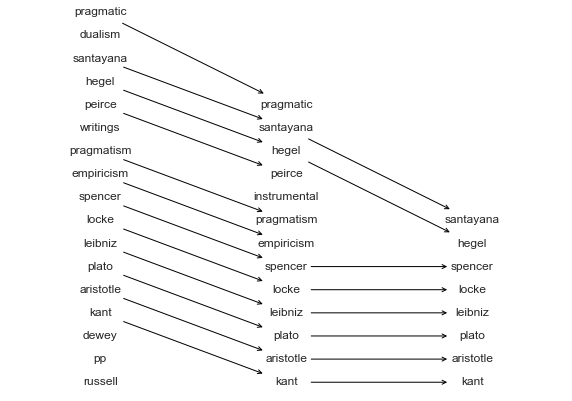

In [74]:
# Here choose the word!
Word='kant'
plot_word_history(Word)

**Obs:** regarding the word Kant and others classical philosophers, it seems like they are progressively isolated from tradition of thought and contemporary philosophers. It could be interpreted as the fact that with the passage of time these authors are canonized/historicized.

### 2.2 SETS OF WORDS ANALYSIS

**Obs:** cohorts are a partition of the words

In [75]:
cohorts=set()
for word in interesting_words:
    cohort=find_cohort(word)
    cohorts.add(tuple(cohort))

In [76]:
len(interesting_words)

197

In [77]:
len(cohorts)

29

In [78]:
sum(len(cohort) for cohort in cohorts)

197

#### COHORTS RELATION
They can share a cohort, share just same clusters or never be in the same cluster.
Use the function **cohort_analysis** to find the cohort for each word in a list of words.

In [79]:
def cohort_analysis (words_list):
    Cohorts=set()
    for w in words_list:
        Cohorts.add(tuple(find_cohort(w)))
    if len(Cohorts)==1:
        print('They all share a common cohort')
        plot_word_history(list(Cohorts).pop()[0])
    elif len(Cohorts)==len(words_list):
        print('All their cohorts are disjoint')
        for w in words_list:
            print(find_cohort(w))
    elif len(Cohorts)>1 and len(Cohorts)<len(words_list):
        for cohort in Cohorts:
            print([w for w in cohort if w in words_list],' share the cohort ',cohort)

In [80]:
target_list=['kant','vol','hegel','educational','school']
cohort_analysis(target_list)

['kant', 'hegel']  share the cohort  ('kant', 'aristotle', 'plato', 'leibniz', 'locke', 'spencer', 'hegel', 'santayana')
['vol']  share the cohort  ('vol', 'ch', 'journal')
['educational', 'school']  share the cohort  ('educational', 'training', 'university', 'pupils', 'committee', 'russia', 'polish', 'instruction', 'schools', 'school', 'teachers', 'teacher', 'students', 'japan', 'curriculum', 'workers')


#### COMMUNITIES RELATION
Given a list of words I want to show how they share or not cluster over periods.

In [81]:
def partition(words,period): # I want to obtain a dictionary where to each cluster is associated a list of words
    # initialize the keys of the partition
    keys=set()
    for word in words:
        keys.add([l for l in Labels if l[0]==(str(period)+"."+str(history.loc[word]['label'+str(period)])+" ")][0])
    # populate the partition
    partition={k:[] for k in keys}
    for word in words:
        partition[[l for l in Labels if l[0]==(str(period)+"."+str(history.loc[word]['label'+str(period)])+" ")][0]].append(word)
    return partition

In [82]:
def comunities_analysis(target_list):
    partitions_over_periods=dict()
    for period in range(1,4):
        partitions_over_periods.update(partition(target_list,period))
    return partitions_over_periods

In [83]:
def sort_lists(list1,list2,list3):
    i=0
    for c in list1:
        if c in list2:
            list1.remove(c)
            list1.insert(i,c)
            list2.remove(c)
            list2.insert(i,c)
            i+=1
    i=0
    for c in list2:
        if c in list3:
            list3.remove(c)
            list3.insert(list2.index(c),c)       
    return list1,list2,list3

In [84]:
def plot_list_history(target_list):
    
    #defining lists of lists

    list1 = [v for k,v in comunities_analysis(target_list).items() if k[0][0]=='1']
    list2 = [v for k,v in comunities_analysis(target_list).items() if k[0][0]=='2']
    list3 = [v for k,v in comunities_analysis(target_list).items() if k[0][0]=='3']
    
    list1,list2,list3=sort_lists(list1,list2,list3)

    DG = nx.DiGraph()
    pos_dict = {}; label_dict = {} # dictionary with the plot info
    
    for i,cluster in enumerate(list1):
        for j,word in enumerate(cluster):
            pos_dict['{}list1'.format(word)] = (0,j+sum(len(cluster) for h,cluster in enumerate(list1) if h <i)+3*i)
            label_dict['{}list1'.format(word)] = word
            DG.add_node('{}list1'.format(word))
            for c in list2:
                if word in c:
                    DG.add_edge('{}list1'.format(word),'{}list2'.format(word))
        
    for i,cluster in enumerate(list2):
        for j,word in enumerate(cluster):
            pos_dict['{}list2'.format(word)] = (1,j+sum(len(cluster) for h,cluster in enumerate(list2) if h <i)+3*i)
            label_dict['{}list2'.format(word)] = word
            DG.add_node('{}list2'.format(word))
            for c in list3:
                if word in c:
                    DG.add_edge('{}list2'.format(word),'{}list3'.format(word))
        
    for i,cluster in enumerate(list3):
        for j,word in enumerate(cluster):
            pos_dict['{}list3'.format(word)] = (2,j+sum(len(cluster) for h,cluster in enumerate(list3) if h <i)+3*i)
            label_dict['{}list3'.format(word)] = word
            DG.add_node('{}list3'.format(word))
        
    nx.draw_networkx(DG,
                     arrows=True,
                     with_labels=True,
                     node_color='w',
                     pos=pos_dict,
                     labels=label_dict,
                     node_size=4000)
    plt.axis('off') # removes the axis to leave only the graph

Given an arbitrary list of words I can show to which cluster each word is assign in a single period or over the whole production and plot it.

In [85]:
target_list=['kant','peirce','hegel','pragmatism','educational']

In [86]:
partition(target_list,3) #in a specific period

{('3.0 ', 'education'): ['educational'],
 ('3.5 ', 'descartes'): ['kant', 'hegel'],
 ('3.1 ', 'philosophy'): ['peirce', 'pragmatism']}

In [87]:
comunities_analysis(target_list) #over periods

{('1.4 ', 'education'): ['educational'],
 ('1.1 ', 'philosophy'): ['kant', 'peirce', 'hegel', 'pragmatism'],
 ('2.0 ', 'education'): ['educational'],
 ('2.1 ', 'philosophy'): ['kant', 'peirce', 'hegel', 'pragmatism'],
 ('3.0 ', 'education'): ['educational'],
 ('3.5 ', 'descartes'): ['kant', 'hegel'],
 ('3.1 ', 'philosophy'): ['peirce', 'pragmatism']}

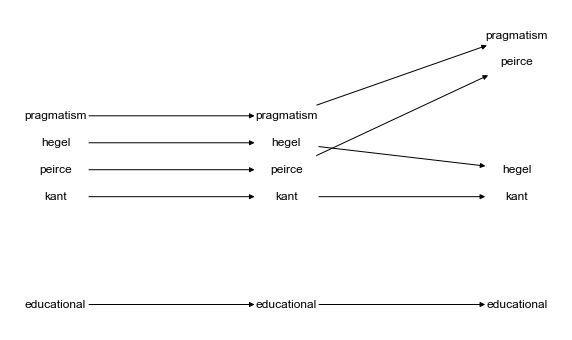

In [88]:
plot_list_history(target_list)

It is also possible to use the words in a specific cluster as target list to study how words spread over other clusters in others periods.

In [89]:
cluster_analysis(1,1) # 1,1 are the period and the cluster label

['russell',
 'pp',
 'dewey',
 'kant',
 'aristotle',
 'plato',
 'leibniz',
 'locke',
 'spencer',
 'empiricism',
 'pragmatism',
 'writings',
 'peirce',
 'hegel',
 'santayana',
 'dualism',
 'pragmatic']

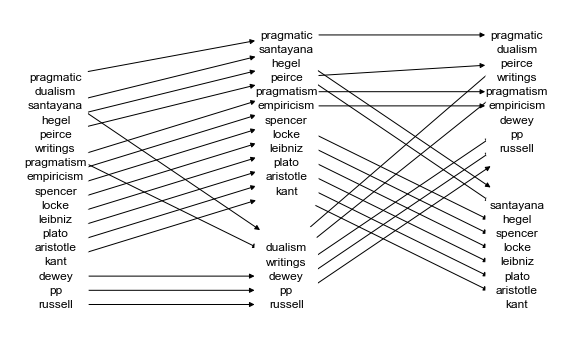

In [90]:
plot_list_history(cluster_analysis(1,1))
plt.rcParams["figure.figsize"] = (10,6)

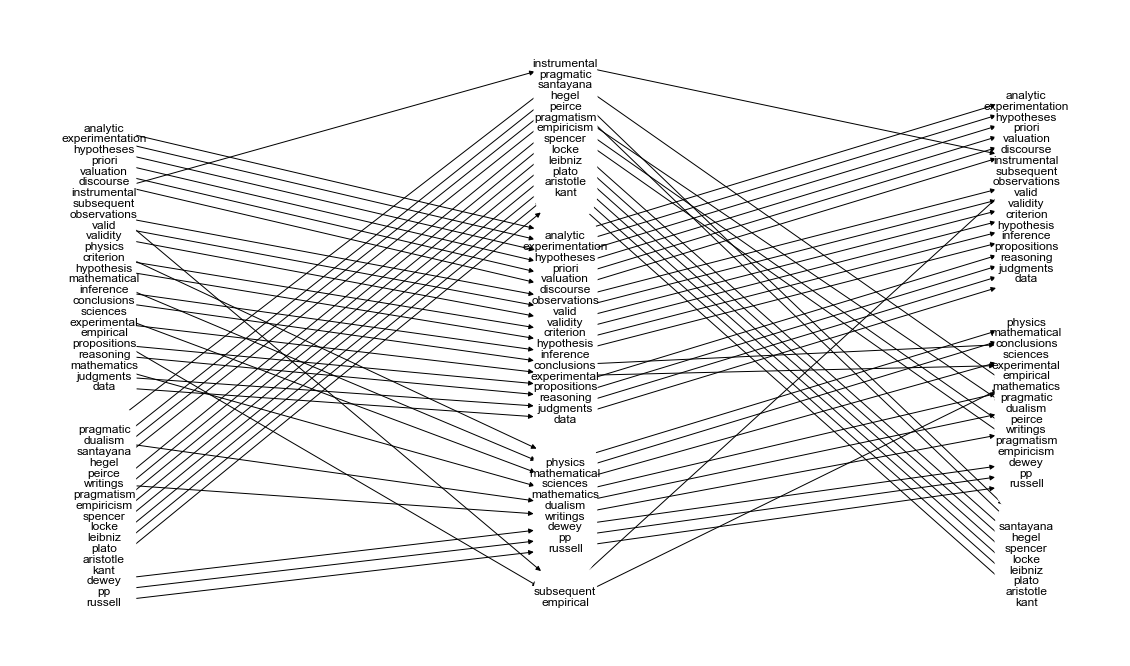

In [91]:
plt.rcParams["figure.figsize"] = (20,12)
plot_list_history(cluster_analysis(1,1)+find_community('instrumental',1))